In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
train=pd.read_csv("train.csv")
train.head()

,id,location,fault_severity
0,14121,location 118,1
1,9320,location 91,0
2,14394,location 152,1
3,8218,location 931,1
4,14804,location 120,0


In [4]:
event_type=pd.read_csv("event_type.csv")
log_feature = pd.read_csv('log_feature.csv')
resource_type = pd.read_csv('resource_type.csv')
severity_type = pd.read_csv('severity_type.csv')

In [5]:
log_feature

,id,log_feature,volume
0,6597,feature 68,6
1,8011,feature 68,7
2,2597,feature 68,1
3,5022,feature 172,2
4,5022,feature 56,1
...,...,...,...
58666,8720,feature 209,1
58667,6488,feature 54,3
58668,878,feature 62,1
58669,4464,feature 209,1


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7381 entries, 0 to 7380
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              7381 non-null   int64 
 1   location        7381 non-null   object
 2   fault_severity  7381 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 173.1+ KB


In [8]:
train['location'].nunique() ,train['fault_severity'].nunique()

(929, 3)

In [9]:
train.shape ,event_type.shape,log_feature.shape,resource_type.shape,severity_type.shape

((7381, 3), (31170, 2), (58671, 3), (21076, 2), (18552, 2))

In [10]:
#eventtype=event_type.drop('id',1)
#logfeature=log_feature.drop('id',1)
#resourceype=resource_type.drop(id,1)
#severitytype=severity_type.drop('id',1)

#list=[train,eventtype,logfeature,resource]
#datas=pd.concat(list2, axis=1)          ->concat üstüne ekliyor,(veri kaybı?)

In [11]:
# verileri kaybetmemek için (ne kadar çok veri varsa doğruluk oranı yüksek olur) merge function kullan.

In [12]:
df1=train.merge(event_type,how='left',left_on='id',right_on='id')
df2=df1.merge(log_feature,how='left',left_on='id',right_on='id')
df3=df2.merge(resource_type,how='left',left_on='id',right_on='id')
df4=df3.merge(severity_type,how='left',left_on='id',right_on='id')

In [13]:
df4

,id,location,fault_severity,event_type,log_feature,volume,resource_type,severity_type
0,14121,location 118,1,event_type 34,feature 312,19,resource_type 2,severity_type 2
1,14121,location 118,1,event_type 34,feature 232,19,resource_type 2,severity_type 2
2,14121,location 118,1,event_type 35,feature 312,19,resource_type 2,severity_type 2
3,14121,location 118,1,event_type 35,feature 232,19,resource_type 2,severity_type 2
4,9320,location 91,0,event_type 34,feature 315,200,resource_type 2,severity_type 2
...,...,...,...,...,...,...,...,...
61834,15189,location 7,0,event_type 11,feature 55,10,resource_type 8,severity_type 1
61835,15189,location 7,0,event_type 11,feature 70,1,resource_type 8,severity_type 1
61836,17067,location 885,0,event_type 11,feature 81,1,resource_type 8,severity_type 1
61837,17067,location 885,0,event_type 11,feature 191,1,resource_type 8,severity_type 1


In [14]:
df4.shape

(61839, 8)

In [15]:
df4.isnull().sum()

id                0
location          0
fault_severity    0
event_type        0
log_feature       0
volume            0
resource_type     0
severity_type     0
dtype: int64

In [16]:
df4.info() #object verileri düzenleyip yazıları kaldıracağım.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61839 entries, 0 to 61838
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              61839 non-null  int64 
 1   location        61839 non-null  object
 2   fault_severity  61839 non-null  int64 
 3   event_type      61839 non-null  object
 4   log_feature     61839 non-null  object
 5   volume          61839 non-null  int64 
 6   resource_type   61839 non-null  object
 7   severity_type   61839 non-null  object
dtypes: int64(3), object(5)
memory usage: 4.2+ MB


In [17]:
df4['location'] = df4['location'].str.replace('location','')
df4['event_type'] = df4['event_type'].str.replace('event_type','')
df4['log_feature'] = df4['log_feature'].str.replace('feature','')
df4['resource_type'] = df4['resource_type'].str.replace('resource_type','')
df4['severity_type']=df4['severity_type'].str.replace('severity_type','')

In [18]:
df4

,id,location,fault_severity,event_type,log_feature,volume,resource_type,severity_type
0,14121,118,1,34,312,19,2,2
1,14121,118,1,34,232,19,2,2
2,14121,118,1,35,312,19,2,2
3,14121,118,1,35,232,19,2,2
4,9320,91,0,34,315,200,2,2
...,...,...,...,...,...,...,...,...
61834,15189,7,0,11,55,10,8,1
61835,15189,7,0,11,70,1,8,1
61836,17067,885,0,11,81,1,8,1
61837,17067,885,0,11,191,1,8,1


In [20]:
df4['location']=pd.to_numeric(df4['location'])
df4['event_type']=pd.to_numeric(df4['event_type'])
df4['log_feature']=pd.to_numeric(df4['log_feature'])
df4['resource_type']=pd.to_numeric(df4['resource_type'])
df4['severity_type']=pd.to_numeric(df4['severity_type'])

In [21]:
#not:gradient boostingte zorlanmamak adına zaten sayısal veriler olduğundan dummy yapmadım. convert numerical yaptım.

In [22]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61839 entries, 0 to 61838
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              61839 non-null  int64
 1   location        61839 non-null  int64
 2   fault_severity  61839 non-null  int64
 3   event_type      61839 non-null  int64
 4   log_feature     61839 non-null  int64
 5   volume          61839 non-null  int64
 6   resource_type   61839 non-null  int64
 7   severity_type   61839 non-null  int64
dtypes: int64(8)
memory usage: 4.2 MB


In [23]:
df4['fault_severity']

0        1
1        1
2        1
3        1
4        0
        ..
61834    0
61835    0
61836    0
61837    0
61838    0
Name: fault_severity, Length: 61839, dtype: int64

<AxesSubplot:>

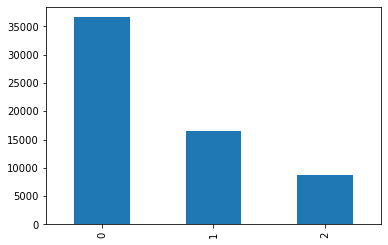

In [25]:
df4['fault_severity'].value_counts().plot.bar()
## 0->hata yok, 1->birkaç hata, 2->çok hata

In [26]:
y = df4.fault_severity
x = df4.drop('fault_severity', axis=1)

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((49471, 7), (12368, 7), (49471,), (12368,))

### Naive Bayes

In [28]:
from sklearn.naive_bayes import GaussianNB
g=GaussianNB()
g.fit(x,y)
from sklearn.naive_bayes import BernoulliNB
b=BernoulliNB()
b.fit(x,y)
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
predict_g=g.predict(x)
predict_b=b.predict(x)

In [29]:
print("Gaussian predict")
print("accuracy score: ", accuracy_score(y,predict_g))
print("precision score: ", precision_score(y,predict_g,average=None))
print("recall score: ", recall_score(y,predict_g,average=None))
print("f1 score: ", f1_score(y,predict_g,average=None))
print("\n")
print("Bernoulli predict")
print("accuracy score: ", accuracy_score(y,predict_b))
print("precision score: ", precision_score(y,predict_b,average=None))
print("recall score: ", recall_score(y,predict_b,average=None))
print("f1 score: ", f1_score(y,predict_b,average=None))

Gaussian predict
accuracy score:  0.5522566665049564
precision score:  [0.76142182 0.3637458  0.312826  ]
recall score:  [0.62980572 0.53031954 0.26829548]
f1 score:  [0.68938805 0.43151545 0.28885458]


Bernoulli predict
accuracy score:  0.5918109930626304
precision score:  [0.59181099 0.         0.        ]
recall score:  [1. 0. 0.]
f1 score:  [0.74356943 0.         0.        ]


### Logistic 

In [30]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x,y)
predict_lr=lr.predict(x)

In [31]:
accuracy_score(y,predict_lr),precision_score(y,predict_lr,average=None),recall_score(y,predict_lr,average=None),f1_score(y,predict_lr,average=None)

(0.5804265916331118,
 array([0.6177761 , 0.38475073, 0.24137931]),
 array([0.8964396 , 0.15879932, 0.05299381]),
 array([0.73146641, 0.22481151, 0.08690745]))

### K-Nearest

In [32]:
from sklearn.neighbors import KNeighborsClassifier
k=KNeighborsClassifier()
k.fit(x,y)
predict_k=k.predict(x)

In [33]:
accuracy_score(y,predict_k),precision_score(y,predict_k,average=None),recall_score(y,predict_k,average=None),f1_score(y,predict_k,average=None)

(0.9363670175779039,
 array([0.94874848, 0.91374135, 0.92606004]),
 array([0.95802935, 0.90262648, 0.90938289]),
 array([0.95336633, 0.90814991, 0.9176457 ]))

### Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier
d=DecisionTreeClassifier()
d.fit(X_train,y_train)
predict_d=d.predict(x)

In [35]:
accuracy_score(y,predict_d),precision_score(y,predict_d,average=None),recall_score(y,predict_d,average=None),f1_score(y,predict_d,average=None)

(0.9904429243681172,
 array([0.9950662 , 0.98546354, 0.9806312 ]),
 array([0.99196655, 0.98874365, 0.98726772]),
 array([0.99351396, 0.98710087, 0.98393827]))

### Gradient Boosting

In [70]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, mean_squared_error

gbc = GradientBoostingClassifier(n_estimators=500, learning_rate=.01,max_depth=6, random_state=42)
gbcmodel=gbc.fit(X_train,y_train)

print("gbc score: " ,gbc.score(X_test,y_test)) 

gbc score:  0.8374029754204398


### Random Forest

In [76]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=500, max_depth=None, max_features='auto', random_state=42)
rfmodel=rf.fit(X_train,y_train)

print("rf score: ",rfmodel.score(X_test,y_test))

rf score:  0.9059670116429496


In [82]:
y_pred_proba_gbc = gbcmodel.predict_proba(X_test)
y_pred_proba_rf = rfmodel.predict_proba(X_test)

In [86]:
# Bundan sonrası artık tahminin kayıt edilmesi için... 

In [83]:
result = pd.DataFrame({
        "id": X_test.id,
        "Predicted fault_severity": y_predgbc,
        "prediction_probability_0": y_pred_proba_gbc[:,0],
        "prediction_probability_1": y_pred_proba_gbc[:,1],
        "prediction_probability_2": y_pred_proba_gbc[:,2]
    },columns=['id','Predicted fault_severity','prediction_probability_0','prediction_probability_1','prediction_probability_2'])

result.head()

,id,Predicted fault_severity,prediction_probability_0,prediction_probability_1,prediction_probability_2
11829,10829,1,0.380987,0.421588,0.197425
7069,7844,0,0.658497,0.234226,0.107277
47779,12926,1,0.406773,0.412332,0.180895
14802,10617,0,0.607490,0.353644,0.038866
32697,2486,0,0.438797,0.289084,0.272119


In [84]:
result.to_csv('Service disruption prediction.csv')